# Naive Bayes Classification algorithm.

<img src = 'Naive_bayes.jpg' height = '50%' width = '800px'>

### Is Naive Bayes a linear model or a non linear model?
- Naive Bayes is a non linear model. You will see that very clearly in Python or R when plotting the prediction boundary which will be a very nice curve well separating the non linearly distributed observations.


### How does the algorithm decide the circle?
In the Intuition lecture we see that a circle is drawn to create a collection of data points similar to the new datapoint. The new datapoint was roughly at the center of the circle and hence we saw that number of green points were lesser than the number of red points and hence the new point went to the red category. But if we had drawn the circle a little differently around the new datapoint, then the number of green points could have been more than red. So how is that circle chosen? There is a parameter in the model that decides the radius of the circle, just like there is a parameter that chooses the number of neighbors in K-NN.

### Importing the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r'C:\Users\acer\Desktop\P14-Machine-Learning-AZ-Template-Folder\Machine Learning A-Z Template Folder\Part 3 - Classification\Section 18 - Naive Bayes\P14-Naive-Bayes\Naive_Bayes')

## Getting the dataset.

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

## Data Visualization.

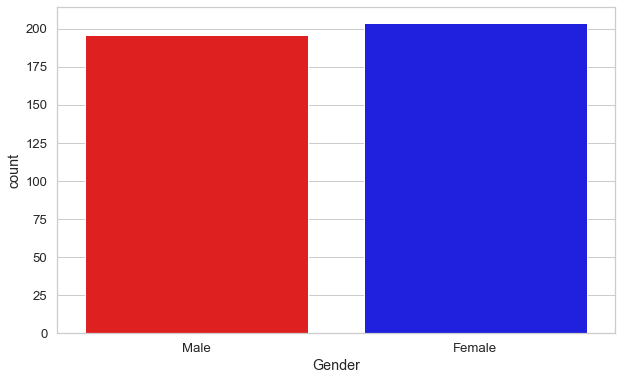

In [5]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(df.Gender, palette = ['red','blue'])
plt.show()

In [6]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

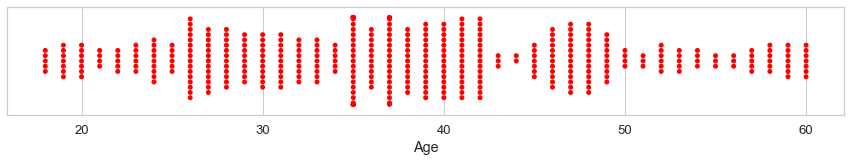

In [7]:
plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(df.Age, color = 'red')
plt.show()

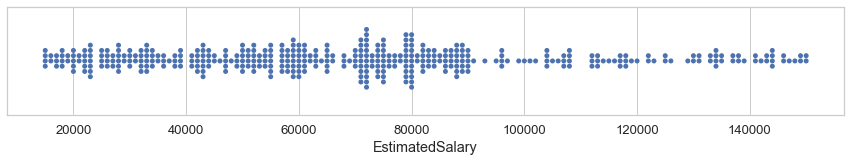

In [8]:
plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(df.EstimatedSalary)
plt.show()

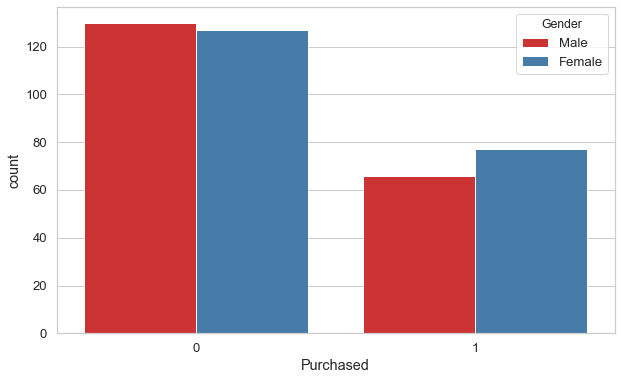

In [9]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(df.Purchased, hue = df.Gender, palette = 'Set1')
plt.show()

In [10]:
pd.crosstab(df.Gender, df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


<hr>

<hr>

### Creating dependent and independent variables.

In [11]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:,-1].values

### Train Test Split.

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

### Scaling the data.

In [13]:
from sklearn.preprocessing import StandardScaler as SScale
sc = SScale()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Fitting the training data into the classifier.

In [14]:
from sklearn.naive_bayes import GaussianNB as GNB
classifier = GNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Making predictions.

In [15]:
predictions = classifier.predict(X_test)

# Confusion Matrix.

In [17]:
from sklearn.metrics import confusion_matrix as CM

In [20]:
cm = CM(y_test, predictions)
cm

array([[64,  4],
       [ 5, 27]], dtype=int64)

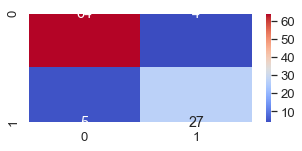

In [25]:
plt.figure(figsize = (5,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.heatmap(cm, annot = True, fmt = 'd', cmap ='coolwarm')
plt.show()

##### The classifier has made 9 incorrect predictions.

# Classification Report:

In [26]:
from sklearn.metrics import classification_report as CR

print(CR(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



### Interpretation:

- Precision for 0: 
    - If the item is not purchased, the classifier will predict it accurately 93% of the time.
- Precision for 1: 
    - If the item is purchased, the classifier will predict it accurately 87% of the time.

- Recall for 0: 
    - 94% of all the non-purchasers are correctly predicted by the classifier as non-purchasers.
- Recall for 1: 
    - 84% of all the purchasers are correctly predicted by the classifier as purchasers.

### Visualising the Training set results.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


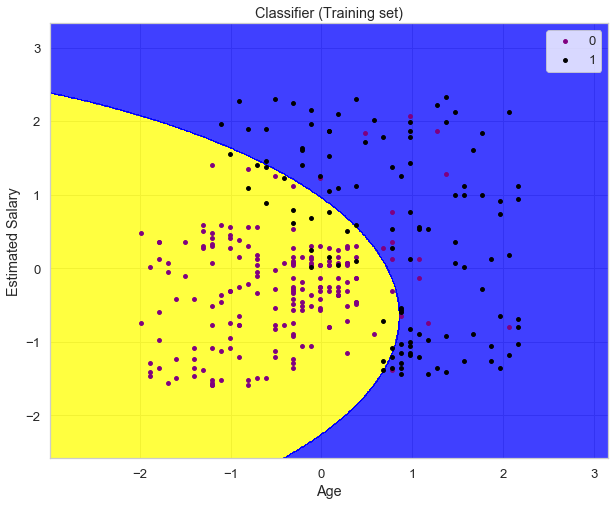

In [42]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('purple', 'black'))(i), label = j, s = 15)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Testing set results.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


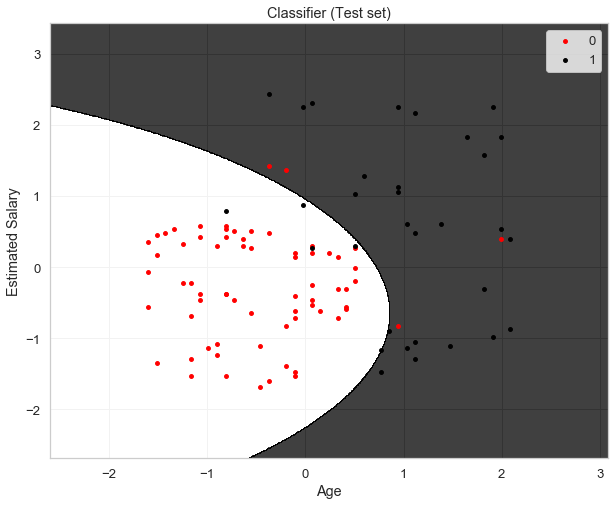

In [47]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'black'))(i), label = j, s = 15)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()